In [1]:
# setup the matplotlib graphics library and configure it to show 
# figures inline in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# make qutip available in the rest of the notebook
from qutip import *

In [3]:
wc = 0.0#  * 2 * np.pi  # cavity frequency
wa = 0.0 # * 2 * np.pi  # atom frequency
g1  = 5.0# * 2 * np.pi  # coupling strength
g2  = 5.0# * 2 * np.pi  # coupling strength
kappa1 = 1.3399#1# * 2 * np.pi       # cavity dissipation rate
kappa2 = 0.8933#1# * 2 * np.pi       # cavity dissipation rate
tau=0.1
kappav1=3.8410
kappav2=1.6674
v1 = np.sqrt(kappav1/(2*tau))
v2 = np.sqrt(kappav2/(2*tau))
print(v1,v2)
gamma = 0.#5.2/2.# * 2 * np.pi        # atom dissipation rate
Omc1 = 0
Ome1 = 0.#*2*np.pi
Omc2 = 0
Ome2 = 0.#*2*np.pi
N = 3              # number of cavity fock states
n_th_a = 0.0        # avg number of thermal bath excitation
use_rwa = True

tlist = np.linspace(0,30,5001)

9.56307382343 6.30079360081


In [4]:
# intial state
psi0 = tensor(basis(N,0), basis(2,1),basis(N,0),basis(2,0),basis(N,0))    # start with an excited atom

# operators
a1 = tensor(destroy(N), qeye(2), qeye(N), qeye(2), qeye(N))
a2 = tensor(qeye(N), qeye(2), qeye(N), qeye(2), destroy(N))
b  = tensor(qeye(N), qeye(2), destroy(N), qeye(2), qeye(N))
s1 = tensor(qeye(N), destroy(2), qeye(N), qeye(2), qeye(N))
s2 = tensor(qeye(N), qeye(2), qeye(N), destroy(2), qeye(N))

# Hamiltonian
if use_rwa:
    H = (wc * (a1.dag()*a1+a2.dag()*a2+b.dag()*b) + wa * (s1.dag()*s1+s2.dag()*s2) +
         g1 * (a1.dag()*s1+a1*s1.dag()) + g2 * (a2.dag()*s2+a2*s2.dag()) + 
         v1 * (a1.dag()*b+a1*b.dag()) + v2 * (a2.dag()*b+a2*b.dag()) + 
         Omc1*(a1+a1.dag()) + Omc2*(a2+a2.dag()) + Ome1*(s1+s1.dag()) + Ome2*(s2+s2.dag()))
    H2 = (wc * (a1.dag()*a1+a2.dag()*a2+b.dag()*b) + wa * (s1.dag()*s1+s2.dag()*s2) +
         g1 * (a1.dag()*s1+a1*s1.dag()) + g2 * (a2.dag()*s2+a2*s2.dag()) + 
         Omc1*(a1+a1.dag()) + Omc2*(a2+a2.dag()) + Ome1*(s1+s1.dag()) + Ome2*(s2+s2.dag()))
else:
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() + a) * (sm + sm.dag())

In [5]:
c_ops = []
c_ops2 = []

# cavity relaxation
rate = kappa1 * (1 + n_th_a)
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a1)
    c_ops2.append(np.sqrt(rate) * a1)
# cavity relaxation
rate = kappa2 * (1 + n_th_a)
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a2)
    c_ops2.append(np.sqrt(rate) * a2)
# cavity excitation, if temperature > 0
rate = kappa2 * n_th_a
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a2.dag())
    c_ops2.append(np.sqrt(rate) * a2.dag())

# cavity excitation, if temperature > 0
rate = kappa1 * n_th_a
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * a1.dag())
    c_ops2.append(np.sqrt(rate) * a1.dag())

# qubit relaxation
rate = gamma
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * s1)
    c_ops2.append(np.sqrt(rate) * s1)
# qubit relaxation
rate = gamma
if rate > 0.0:
    c_ops.append(np.sqrt(rate) * s2)
    c_ops2.append(np.sqrt(rate) * s2)

rate = kappav1
if rate > 0.0:
    c_ops2.append(np.sqrt(rate) * a1)
rate = kappav2
if rate > 0.0:
    c_ops2.append(np.sqrt(rate) * a2)



In [6]:
output2 = mcsolve(H, psi0, tlist, c_ops, [a1.dag()*a1,a2.dag()*a2,s1.dag()*s1,s2.dag()*s2,b.dag()*b
                                         ,s1.dag()*s1-s1*s1.dag(),s2.dag()*s2-s2*s2.dag()],
                  ntraj=10000, options=Options(store_states=False))#True))
output = mcsolve(H2, psi0, tlist, c_ops2, [a1.dag()*a1,a2.dag()*a2,s1.dag()*s1,s2.dag()*s2,b.dag()*b
                                         ,s1.dag()*s1-s1*s1.dag(),s2.dag()*s2-s2*s2.dag()],
                  ntraj=10000, options=Options(store_states=False))#True))


10.0%. Run time: 104.44s. Est. time left: 00:00:15:39
20.0%. Run time: 196.88s. Est. time left: 00:00:13:07
30.0%. Run time: 290.37s. Est. time left: 00:00:11:17
40.0%. Run time: 381.94s. Est. time left: 00:00:09:32
50.0%. Run time: 475.89s. Est. time left: 00:00:07:55
60.0%. Run time: 568.47s. Est. time left: 00:00:06:18
70.0%. Run time: 659.62s. Est. time left: 00:00:04:42
80.0%. Run time: 748.29s. Est. time left: 00:00:03:07
90.0%. Run time: 836.70s. Est. time left: 00:00:01:32
100.0%. Run time: 924.41s. Est. time left: 00:00:00:00
Total run time: 924.43s
10.0%. Run time:  91.31s. Est. time left: 00:00:13:41
20.0%. Run time: 177.10s. Est. time left: 00:00:11:48
30.0%. Run time: 262.97s. Est. time left: 00:00:10:13
40.0%. Run time: 348.58s. Est. time left: 00:00:08:42
50.0%. Run time: 439.78s. Est. time left: 00:00:07:19
60.0%. Run time: 527.05s. Est. time left: 00:00:05:51
70.0%. Run time: 616.31s. Est. time left: 00:00:04:24
80.0%. Run time: 711.07s. Est. time left: 00:00:02:57
90.

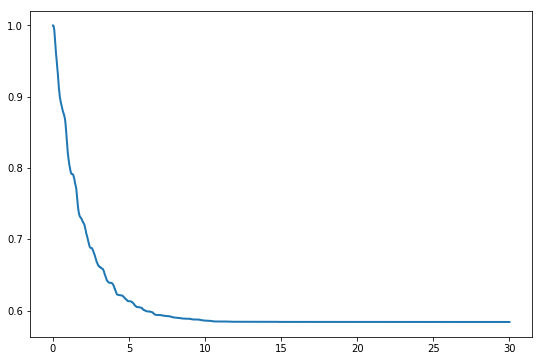

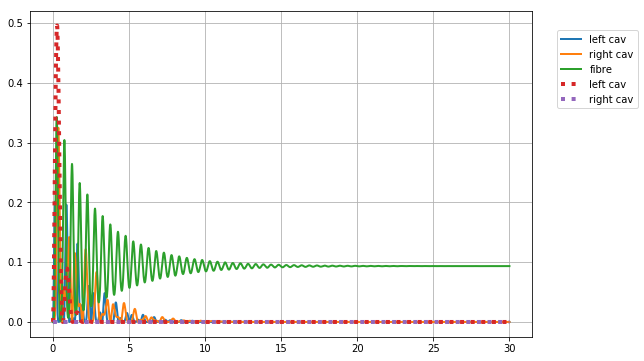

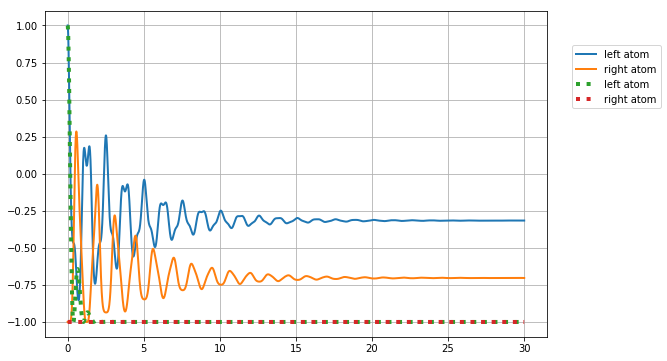

In [7]:
#Data2 = np.zeros((1001,5))
#Data2[:,:] = np.genfromtxt('./CCQED_MC.txt')
tlistp = tlist
plt.figure(0,figsize=(9,6))
norm = output2.expect[0]+output2.expect[1]+output2.expect[2]+output2.expect[3]+output2.expect[4]
#norm2 = output.expect[0]+output.expect[1]+output.expect[2]+output.expect[3]+output.expect[4]
plt.plot(tlistp, norm,lw=2)
#plt.plot(tlistp, norm2,lw=2,ls=":")
#print(np.any(output.expect[4]))
plt.figure(1,figsize=(9,6))
plt.plot(tlistp, output2.expect[0],lw=2,label="left cav")
plt.plot(tlistp, output2.expect[1],lw=2,label="right cav")
plt.plot(tlistp, output2.expect[4],lw=2,label="fibre")
plt.plot(tlistp, output.expect[0],lw=4,ls=":",label="left cav")
plt.plot(tlistp, output.expect[1],lw=4,ls=":",label="right cav")
#plt.plot(tlistp, output.expect[4],lw=2,ls=":",label=)

#plt.plot(Data2[:,0], Data2[:,3],ls="--",lw=2)
#plt.plot(Data2[:,0], Data2[:,4],ls="--",lw=2)
plt.grid(True)
plt.legend(loc=(1.05,0.7))
#plt.xlim(0,100)
plt.figure(2,figsize=(9,6))
plt.plot(tlistp, output2.expect[5],lw=2,label="left atom")
plt.plot(tlistp, output2.expect[6],lw=2,label= "right atom")
plt.plot(tlistp, output.expect[5],lw=4,ls=":",label="left atom")
plt.plot(tlistp, output.expect[6],lw=4,ls=":",label= "right atom")
plt.legend(loc=(1.05,0.7))
#plt.plot(Data2[:,0], Data2[:,1],ls="--",lw=2)
#plt.plot(Data2[:,0], Data2[:,2],ls="--",lw=2)

plt.grid(True)
#plt.xlim(0,100)
plt.grid(True)
OUT = np.stack((tlistp,output2.expect[5],output2.expect[6],output2.expect[0],
                output2.expect[1],output2.expect[4]),axis=1)
np.savetxt("../Data/CCQED_MC40.txt",OUT)
OUT2 = np.stack((tlistp,output.expect[5],output.expect[6],output.expect[0],output.expect[1]),axis=1)
np.savetxt("../Data/CCQED_MC40_diss.txt",OUT2)